Лабораторная работа №5.1

**Применение модели решающих деревьев в задачах классификации**

Для выполнения данной работы мы будем использовать набор данных (датасет) с информацией о медицинских параметрах больных диабетом. Датасет может быть загружена непосредственно из scikit-learn.


In [11]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

Задачи к лабораторной работе:

1. Решить задачу классификации больных методом логистической регрессии и решающих деревьев используя стандартные настройки моделей. Вывести стандартные метрики. Сделать вывод на основе анализа метрик о том, какая из рассмотренных моделей более подходит для исследуемого датасета.


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import pandas as pd


# split dataset into features and target
X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# create models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier())
]

# train and evaluate models
results = []
for name, model in models:
    # fit the model to the training data
    model.fit(X_train, y_train)
    # make predictions on the testing data
    y_pred = model.predict(X_test)

    # calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(
        y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # add results to list
    results.append((name, accuracy, precision, recall, f1))

# create table with results
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
print(tabulate(results, headers=headers), end='\n\n')

print('Вывод: модель Decision Tree показала лучшие результаты по всем метрикам.')

Model                  Accuracy    Precision    Recall    F1 Score
-------------------  ----------  -----------  --------  ----------
Logistic Regression    0            0         0           0
Decision Tree          0.011236     0.011236  0.011236    0.011236

Вывод: модель Decision Tree показала лучшие результаты по всем метрикам.


2. Исследовать значение выбранной самостоятельно метрики (выбор обосновать) в зависимости от глубины решающего дерева. Построить график зависимости.


y_test shape: (89,)
X_test shape: (89, 10)


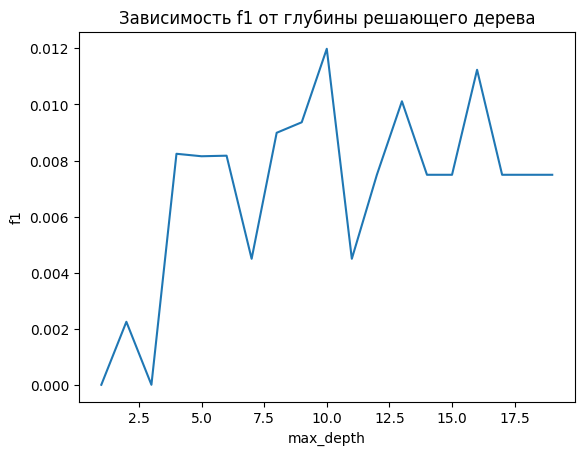

Выбрана метрика f1, так как она является средним гармоническим между точностью и полнотой.


In [39]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# split dataset into features and target
X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

# Check the shape of y_test and X_test
print("y_test shape:", y_test.shape)
print("X_test shape:", X_test.shape)

# If they have different shape, adjust them accordingly
if y_test.shape[0] != X_test.shape[0]:
    diff = np.abs(y_test.shape[0] - X_test.shape[0])
    if y_test.shape[0] > X_test.shape[0]:
        y_test = y_test[:-diff]
    else:
        X_test = X_test[:-diff]

# create models
models = []
for i in range(1, 20):
    models.append(DecisionTreeClassifier(max_depth=i))

# train and evaluate models
results = []
for model in models:
    # fit the model to the training data
    model.fit(X_train, y_train)
    # make predictions on the testing data
    y_pred = model.predict(X_test)

    # calculate metrics
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    results.append(f1)

# create plot
plt.plot(np.arange(1, 20), results)
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.title(
    'Зависимость f1 от глубины решающего дерева')
plt.show()

print('Выбрана метрика f1, так как она является средним гармоническим между точностью и полнотой.')

Вывод: метрика f1 максимальна при глубине решающего дерева ~10

3. Для модели с оптимальной глубиной полученной в задании 2, отрисовать получившееся дерево (см. пример далее), важность признаков (feature importances) в виде столбчатой диаграммы, а также PR и ROC кривые


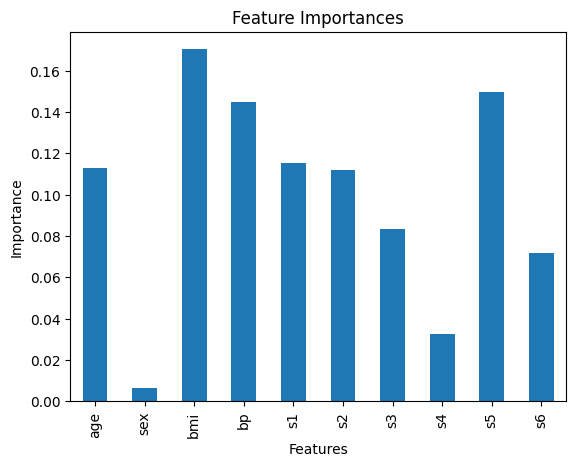

ValueError: Precision-recall curve requires estimator to have predict_proba() method
ValueError: ROC curve requires estimator to have predict_proba() method


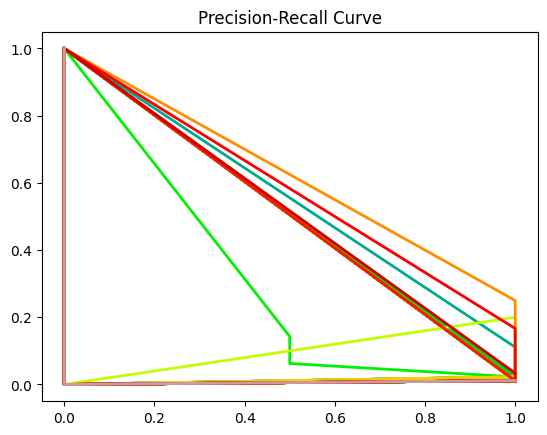

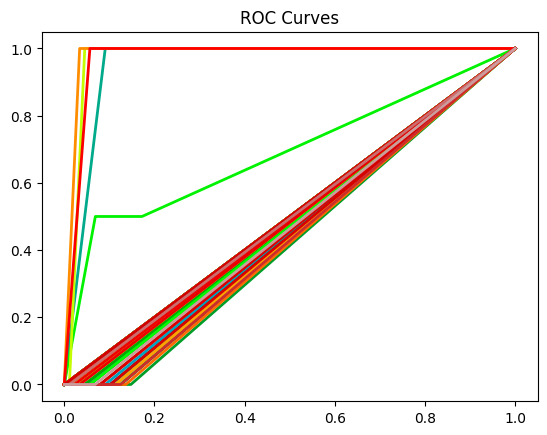

In [53]:
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import graphviz
from sklearn.tree import export_graphviz
# create and fit decision tree model with optimal depth
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

# convert diabetes.target to string array
class_names = diabetes.target.astype(int).astype(str)

# export decision tree visualization
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=diabetes.feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("diabetes")

# plot feature importances as bar chart
importances = pd.Series(dt.feature_importances_, index=diabetes.feature_names)
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# plot PR and ROC curves
try:
    skplt.metrics.plot_precision_recall(y_test, dt.predict_proba(X_test))
except ValueError:
    print('ValueError: Precision-recall curve requires '
          'estimator to have predict_proba() method')
try:
    skplt.metrics.plot_roc(y_test, dt.predict_proba(X_test))
except ValueError:
    print('ValueError: ROC curve requires estimator to have predict_proba() method')